## Data analysis about cifar100 dataset about different power level and performence

In [26]:
import numpy as np
import os

### This part is analying the energy consumption

In [27]:
# show the path of the current directory
curPath = os.getcwd()
print(curPath)
# show the parent directory of the current directory
parentPath = os.path.abspath(os.path.join(curPath, os.pardir))
print(parentPath)
# the data path is in the parentPath/Data/alexnet/cifar100
dataPath = os.path.join(parentPath, 'Data/alexnet/cifar100')
# show all the folders in the data path
print(os.listdir(dataPath))
# select all the fodlers with the name containing 'Power'
folderList = [f for f in os.listdir(dataPath) if 'Power' in f]
print(folderList)
# reorder the folder list according to the number in the folder name
folderList.sort(key=lambda x: int(x[-2:]))


/Users/dtjgp/Learning/GreenAI/PVWatts/code
/Users/dtjgp/Learning/GreenAI/PVWatts
['Power95', 'Power50', 'Power60', 'Power45', 'Power80', 'Power75', 'Power65', 'Power55', 'Power90', 'Power70', 'Power85', 'Power40', 'E50_B128_R0']
['Power95', 'Power50', 'Power60', 'Power45', 'Power80', 'Power75', 'Power65', 'Power55', 'Power90', 'Power70', 'Power85', 'Power40']


In [28]:
def load_data_from_folder(folder_name):
    folderPath = os.path.join(dataPath, folder_name)
    print(folderPath)
    print(os.listdir(folderPath))
    
    TrainTime = np.load(os.path.join(folderPath, 'Train_time.npy'), allow_pickle=True)
    # print('The TrainTime data of each epoch are: ', TrainTime)
    
    LayersTime = np.load(os.path.join(folderPath, 'Layers_time.npy'), allow_pickle=True)
    # print('The LayersTime of each epoch are: ', LayersTime)
    
    EpochTime = np.load(os.path.join(folderPath, 'Epoch_time.npy'), allow_pickle=True)
    # print('Each epoch running time are: ', EpochTime)
    
    BatchEnergy = np.load(os.path.join(folderPath, 'Epoch_energy.npy'), allow_pickle=True)
    # print('The energy consumption of each batch in each epoch are: ', BatchEnergy)
    
    TrainAccuracy = np.load(os.path.join(folderPath, 'Train_acc.npy'), allow_pickle=True)
    # print('The training accuracy of each epoch are: ', TrainAccuracy)
    
    TestAccuracy = np.load(os.path.join(folderPath, 'Test_acc.npy'), allow_pickle=True)
    # print('The test accuracy of each epoch are: ', TestAccuracy)
    
    return TrainTime, LayersTime, EpochTime, BatchEnergy, TrainAccuracy, TestAccuracy

print(folderList)
TrainTime_40, LayersTime_40, EpochTime_40, BatchEnergy_40, TrainAccuracy_40, TestAccuracy_40 = load_data_from_folder(folderList[0])
TrainTime_45, LayersTime_45, EpochTime_45, BatchEnergy_45, TrainAccuracy_45, TestAccuracy_45 = load_data_from_folder(folderList[1])
TrainTime_50, LayersTime_50, EpochTime_50, BatchEnergy_50, TrainAccuracy_50, TestAccuracy_50 = load_data_from_folder(folderList[2])
TrainTime_55, LayersTime_55, EpochTime_55, BatchEnergy_55, TrainAccuracy_55, TestAccuracy_55 = load_data_from_folder(folderList[3])
TrainTime_60, LayersTime_60, EpochTime_60, BatchEnergy_60, TrainAccuracy_60, TestAccuracy_60 = load_data_from_folder(folderList[4])
TrainTime_65, LayersTime_65, EpochTime_65, BatchEnergy_65, TrainAccuracy_65, TestAccuracy_65 = load_data_from_folder(folderList[5])
TrainTime_70, LayersTime_70, EpochTime_70, BatchEnergy_70, TrainAccuracy_70, TestAccuracy_70 = load_data_from_folder(folderList[6])
TrainTime_75, LayersTime_75, EpochTime_75, BatchEnergy_75, TrainAccuracy_75, TestAccuracy_75 = load_data_from_folder(folderList[7])
TrainTime_80, LayersTime_80, EpochTime_80, BatchEnergy_80, TrainAccuracy_80, TestAccuracy_80 = load_data_from_folder(folderList[8])
TrainTime_85, LayersTime_85, EpochTime_85, BatchEnergy_85, TrainAccuracy_85, TestAccuracy_85 = load_data_from_folder(folderList[9])
TrainTime_90, LayersTime_90, EpochTime_90, BatchEnergy_90, TrainAccuracy_90, TestAccuracy_90 = load_data_from_folder(folderList[10])
TrainTime_95, LayersTime_95, EpochTime_95, BatchEnergy_95, TrainAccuracy_95, TestAccuracy_95 = load_data_from_folder(folderList[11])

['Power40', 'Power45', 'Power50', 'Power55', 'Power60', 'Power65', 'Power70', 'Power75', 'Power80', 'Power85', 'Power90', 'Power95']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power40
['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power45
['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power50
['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power55
['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power60

### 该数据集为 cifar100, 所以在这个数据集下,所以对于数据的分析集中于数据的能耗和时间  
    1. 数据的内容主要包括每个 epoch 的运行时长以及能耗数据,并且对于每个能耗上限的设置下,只运行了 5 个 epoch

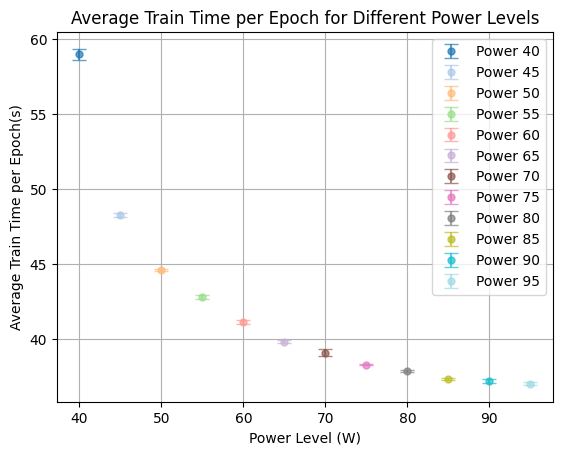

In [29]:
import matplotlib.pyplot as plt

# Define the power levels and corresponding average TrainTime and standard deviation
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
average_train_times = [np.mean(TrainTime_40), np.mean(TrainTime_45), np.mean(TrainTime_50), np.mean(TrainTime_55), np.mean(TrainTime_60), np.mean(TrainTime_65), np.mean(TrainTime_70), np.mean(TrainTime_75), np.mean(TrainTime_80), np.mean(TrainTime_85), np.mean(TrainTime_90), np.mean(TrainTime_95)]
std_train_times = [np.std(TrainTime_40), np.std(TrainTime_45), np.std(TrainTime_50), np.std(TrainTime_55), np.std(TrainTime_60), np.std(TrainTime_65), np.std(TrainTime_70), np.std(TrainTime_75), np.std(TrainTime_80), np.std(TrainTime_85), np.std(TrainTime_90), np.std(TrainTime_95)]

# Define colors for each power level with more distinct separation
colors = plt.cm.tab20(np.linspace(0, 1, len(power_levels)))

# Plot the average TrainTime for each power level with error bars and different colors
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, average_train_times[i], yerr=std_train_times[i], fmt='o', markersize=5, capsize=5, color=colors[i], label=f'Power {power_level}', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Average Train Time per Epoch(s)')
plt.title('Average Train Time per Epoch for Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()


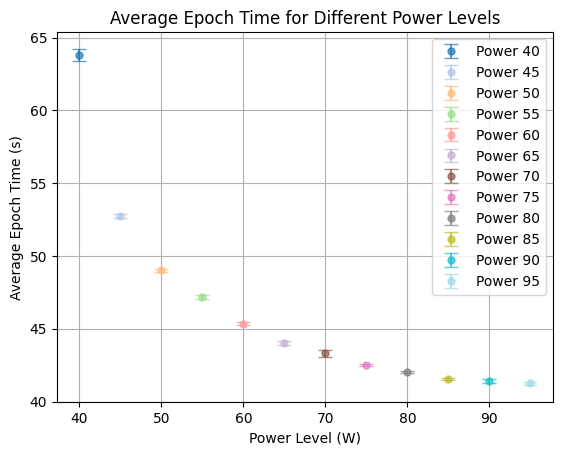

In [30]:
# Define the power levels and corresponding average EpochTime and standard deviation
average_epoch_times = [np.mean(EpochTime_40), np.mean(EpochTime_45), np.mean(EpochTime_50), np.mean(EpochTime_55), np.mean(EpochTime_60), np.mean(EpochTime_65), np.mean(EpochTime_70), np.mean(EpochTime_75), np.mean(EpochTime_80), np.mean(EpochTime_85), np.mean(EpochTime_90), np.mean(EpochTime_95)]
std_epoch_times = [np.std(EpochTime_40), np.std(EpochTime_45), np.std(EpochTime_50), np.std(EpochTime_55), np.std(EpochTime_60), np.std(EpochTime_65), np.std(EpochTime_70), np.std(EpochTime_75), np.std(EpochTime_80), np.std(EpochTime_85), np.std(EpochTime_90), np.std(EpochTime_95)]

# Plot the average EpochTime for each power level with error bars and different colors
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, average_epoch_times[i], yerr=std_epoch_times[i], fmt='o', markersize=5, capsize=5, color=colors[i], label=f'Power {power_level}', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Average Epoch Time (s)')
plt.title('Average Epoch Time for Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
# print the shape of the BatchEnergy_40
print(BatchEnergy_40.shape)
print(BatchEnergy_40)

(5, 1)
[[array([25.12, 31.14, 39.57, 39.32, 39.26, 39.28, 39.54, 39.04, 39.43,
         39.02, 39.49, 39.54, 39.09, 39.45, 39.33, 39.34, 39.33, 39.35,
         39.32, 39.3 , 39.31, 39.3 , 38.97, 39.64, 39.35, 39.27, 39.22,
         39.54, 39.25, 39.42, 39.36, 39.18, 39.48, 39.47, 39.29, 38.89,
         39.32, 39.47, 39.38, 38.84, 39.38, 39.45, 39.29, 38.85, 39.54,
         39.4 , 39.34, 38.83, 39.51, 39.41, 39.42, 39.35, 39.14, 39.34,
         39.03, 39.6 , 39.31, 39.51, 39.17, 34.52, 38.51, 38.42, 38.26,
         37.89])                                                       ]
 [array([37.62, 36.6 , 39.03, 39.54, 39.29, 39.16, 39.06, 39.44, 39.41,
         39.48, 39.32, 39.4 , 39.01, 39.04, 39.41, 38.96, 39.18, 39.38,
         39.06, 39.21, 39.45, 39.  , 39.04, 39.48, 38.99, 39.18, 39.42,
         39.09, 39.12, 39.46, 38.98, 39.19, 39.44, 39.08, 39.27, 39.49,
         39.11, 39.14, 39.48, 39.01, 39.13, 39.48, 39.13, 39.24, 39.38,
         39.15, 39.29, 39.47, 39.09, 39.21, 39.55, 39.12

In [49]:
# # show the time consumed of each epoch
# for i in range(len(BatchEnergy_40)):
#     epcohi = BatchEnergy_40[i][0]
#     print('The time consumed of each batch in epoch ', i, ' is: ', len(epcohi))

# create several ndarray to store the average BatchEnergy of each power level
AvgBatchEnergy_40, AvgBatchEnergy_45, AvgBatchEnergy_50, AvgBatchEnergy_55, AvgBatchEnergy_60 = np.zeros(len(BatchEnergy_40)), np.zeros(len(BatchEnergy_45)), np.zeros(len(BatchEnergy_50)), np.zeros(len(BatchEnergy_55)), np.zeros(len(BatchEnergy_60))
AvgBatchEnergy_65, AvgBatchEnergy_70, AvgBatchEnergy_75, AvgBatchEnergy_80, AvgBatchEnergy_85 = np.zeros(len(BatchEnergy_65)), np.zeros(len(BatchEnergy_70)), np.zeros(len(BatchEnergy_75)), np.zeros(len(BatchEnergy_80)), np.zeros(len(BatchEnergy_85))
AvgBatchEnergy_90, AvgBatchEnergy_95 = np.zeros(len(BatchEnergy_90)), np.zeros(len(BatchEnergy_95))

# create several ndarray to store the total energy consumption of each power level
EpochEnergy_40, EpochEnergy_45, EpochEnergy_50, EpochEnergy_55, EpochEnergy_60 = np.zeros(len(BatchEnergy_40)), np.zeros(len(BatchEnergy_45)), np.zeros(len(BatchEnergy_50)), np.zeros(len(BatchEnergy_55)), np.zeros(len(BatchEnergy_60))
EpochEnergy_65, EpochEnergy_70, EpochEnergy_75, EpochEnergy_80, EpochEnergy_85 = np.zeros(len(BatchEnergy_65)), np.zeros(len(BatchEnergy_70)), np.zeros(len(BatchEnergy_75)), np.zeros(len(BatchEnergy_80)), np.zeros(len(BatchEnergy_85))
EpochEnergy_90, EpochEnergy_95 = np.zeros(len(BatchEnergy_90)), np.zeros(len(BatchEnergy_95))

BatchEnergyList = [BatchEnergy_40, BatchEnergy_45, BatchEnergy_50, BatchEnergy_55, BatchEnergy_60, BatchEnergy_65, BatchEnergy_70, BatchEnergy_75, BatchEnergy_80,\
                    BatchEnergy_85, BatchEnergy_90, BatchEnergy_95]
PowerLevelList = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
AvgBatchEnergyList = [AvgBatchEnergy_40, AvgBatchEnergy_45, AvgBatchEnergy_50, AvgBatchEnergy_55, AvgBatchEnergy_60, AvgBatchEnergy_65, AvgBatchEnergy_70, AvgBatchEnergy_75, AvgBatchEnergy_80,\
                      AvgBatchEnergy_85, AvgBatchEnergy_90, AvgBatchEnergy_95]
EpochEnergyList = [EpochEnergy_40, EpochEnergy_45, EpochEnergy_50, EpochEnergy_55, EpochEnergy_60, EpochEnergy_65, EpochEnergy_70, EpochEnergy_75, EpochEnergy_80,\
                     EpochEnergy_85, EpochEnergy_90, EpochEnergy_95]


for i in range(len(BatchEnergyList)):
    BatchEnergyi = BatchEnergyList[i]
    PowerLeveli = PowerLevelList[i]
    for j in range(len(BatchEnergyi)):
        epochi = BatchEnergyi[j]
        epochi = np.array(epochi[0])
        print(f'The time consumed of each epoch in power level {PowerLeveli} is: {len(epochi)}')
        AvgEnergySecondEpochi = np.round(np.mean(epochi), 2)
        AllEnergyEpochi = np.round(np.sum(epochi), 2)
        print(f'The average energy consumption per second in power level {PowerLeveli} is: {AvgEnergySecondEpochi}')
        print(f'The total energy consumption in power level {PowerLeveli} is: {AllEnergyEpochi}')
        AvgBatchEnergyList[i][j] = AvgEnergySecondEpochi
        EpochEnergyList[i][j] = AllEnergyEpochi
    print('*' * 50)

The time consumed of each epoch in power level 40 is: 64
The average energy consumption per second in power level 40 is: 38.82
The total energy consumption in power level 40 is: 2484.68
The time consumed of each epoch in power level 40 is: 64
The average energy consumption per second in power level 40 is: 39.06
The total energy consumption in power level 40 is: 2499.56
The time consumed of each epoch in power level 40 is: 64
The average energy consumption per second in power level 40 is: 39.24
The total energy consumption in power level 40 is: 2511.06
The time consumed of each epoch in power level 40 is: 65
The average energy consumption per second in power level 40 is: 39.3
The total energy consumption in power level 40 is: 2554.35
The time consumed of each epoch in power level 40 is: 65
The average energy consumption per second in power level 40 is: 39.27
The total energy consumption in power level 40 is: 2552.74
**************************************************
The time consumed of

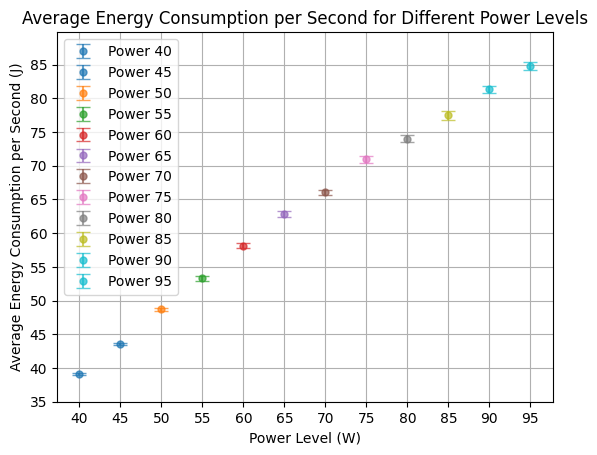

In [50]:
# Define the power levels and corresponding average batch energy
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
average_batch_energy = [np.mean(AvgBatchEnergy_40), np.mean(AvgBatchEnergy_45), np.mean(AvgBatchEnergy_50), np.mean(AvgBatchEnergy_55), np.mean(AvgBatchEnergy_60), np.mean(AvgBatchEnergy_65), np.mean(AvgBatchEnergy_70), np.mean(AvgBatchEnergy_75), np.mean(AvgBatchEnergy_80), np.mean(AvgBatchEnergy_85), np.mean(AvgBatchEnergy_90), np.mean(AvgBatchEnergy_95)]
std_batch_energy = [np.std(AvgBatchEnergy_40), np.std(AvgBatchEnergy_45), np.std(AvgBatchEnergy_50), np.std(AvgBatchEnergy_55), np.std(AvgBatchEnergy_60), np.std(AvgBatchEnergy_65), np.std(AvgBatchEnergy_70), np.std(AvgBatchEnergy_75), np.std(AvgBatchEnergy_80), np.std(AvgBatchEnergy_85), np.std(AvgBatchEnergy_90), np.std(AvgBatchEnergy_95)]

# Define colors for each power level with higher contrast
colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))

# Plot the average batch energy for each power level with error bars and different colors
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, average_batch_energy[i], yerr=std_batch_energy[i], fmt='o', markersize=5, capsize=5, color=colors[i], label=f'Power {power_level}', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Average Energy Consumption per Second (J)')
plt.title('Average Energy Consumption per Second for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

# Set y-axis ticks to be more clear with each block being 5
plt.yticks(np.arange(35, max(average_batch_energy) + 5, 5))

# Set y-axis limit to start from 35
plt.ylim(35, max(average_batch_energy) + 5)

plt.show()

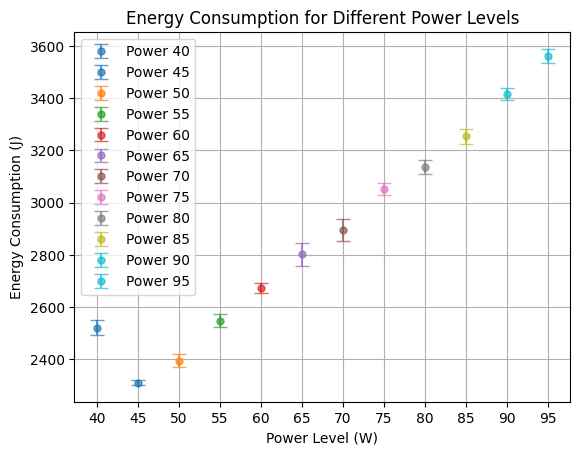

In [51]:
# Define the power levels and corresponding average EpochEnergy and standard deviation
average_epoch_energy = [np.mean(EpochEnergy_40), np.mean(EpochEnergy_45), np.mean(EpochEnergy_50), np.mean(EpochEnergy_55), np.mean(EpochEnergy_60), np.mean(EpochEnergy_65), np.mean(EpochEnergy_70), np.mean(EpochEnergy_75), np.mean(EpochEnergy_80), np.mean(EpochEnergy_85), np.mean(EpochEnergy_90), np.mean(EpochEnergy_95)]
std_epoch_energy = [np.std(EpochEnergy_40), np.std(EpochEnergy_45), np.std(EpochEnergy_50), np.std(EpochEnergy_55), np.std(EpochEnergy_60), np.std(EpochEnergy_65), np.std(EpochEnergy_70), np.std(EpochEnergy_75), np.std(EpochEnergy_80), np.std(EpochEnergy_85), np.std(EpochEnergy_90), np.std(EpochEnergy_95)]

# Define colors for each power level with higher contrast
colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))

# Plot the average EpochEnergy for each power level with error bars and different colors
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, average_epoch_energy[i], yerr=std_epoch_energy[i], fmt='o', markersize=5, capsize=5, color=colors[i], label=f'Power {power_level}', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Energy Consumption (J)')
plt.title('Energy Consumption for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

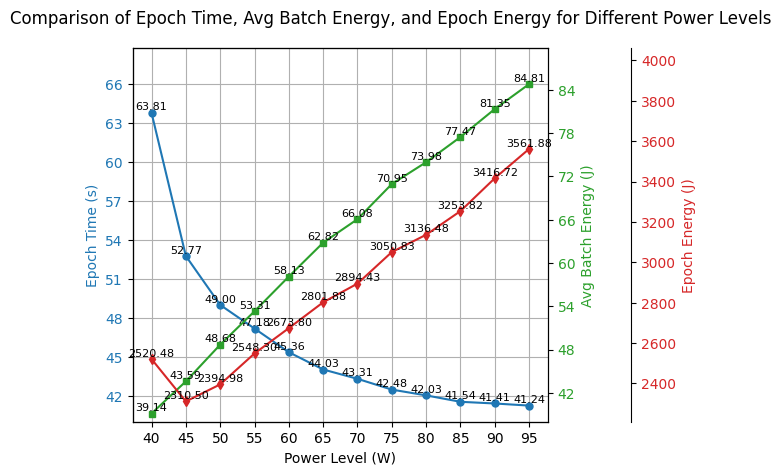

In [67]:
from matplotlib.ticker import MaxNLocator

fig, ax1 = plt.subplots()

# Plot EpochTime
ax1.set_xlabel('Power Level (W)')
ax1.set_ylabel('Epoch Time (s)', color='tab:blue')
ax1.plot(power_levels, average_epoch_times, 'o-', color='tab:blue', label='Epoch Time', markersize=5)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Annotate each point with its value
for i, txt in enumerate(average_epoch_times):
    ax1.annotate(f'{txt:.2f}', (power_levels[i], average_epoch_times[i]), textcoords="offset points", xytext=(0,2), ha='center', fontsize=8)

# Create a secondary y-axis to plot AvgBatchEnergy
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Batch Energy (J)', color='tab:green')
ax2.plot(power_levels, average_batch_energy, 's-', color='tab:green', label='Avg Batch Energy', markersize=5)
ax2.tick_params(axis='y', labelcolor='tab:green')

# Annotate each point with its value
for i, txt in enumerate(average_batch_energy):
    ax2.annotate(f'{txt:.2f}', (power_levels[i], average_batch_energy[i]), textcoords="offset points", xytext=(0,2), ha='center', fontsize=8)

# Create another secondary y-axis to plot EpochEnergy
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Epoch Energy (J)', color='tab:red')
ax3.plot(power_levels, average_epoch_energy, 'd-', color='tab:red', label='Epoch Energy', markersize=5)
ax3.tick_params(axis='y', labelcolor='tab:red')

# Annotate each point with its value
for i, txt in enumerate(average_epoch_energy):
    ax3.annotate(f'{txt:.2f}', (power_levels[i], average_epoch_energy[i]), textcoords="offset points", xytext=(0,2), ha='center', fontsize=8)

# Add a title and show the plot
fig.suptitle('Comparison of Epoch Time, Avg Batch Energy, and Epoch Energy for Different Power Levels')
fig.tight_layout()

# Set x-axis ticks to be more clear with each block being 5
ax1.set_xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

# Set y-axis limits to be close to the minimum value
ax1.set_ylim(min(average_epoch_times) - 1, max(average_epoch_times) + 5)
ax2.set_ylim(min(average_batch_energy) - 1, max(average_batch_energy) + 5)
ax3.set_ylim(min(average_epoch_energy) - 100, max(average_epoch_energy) + 500)

# Add more labels to the y-axes
ax1.set_yticks(np.arange(int(min(average_epoch_times) - 1), int(max(average_epoch_times) + 5), 2))
ax2.set_yticks(np.arange(int(min(average_batch_energy) - 1), int(max(average_batch_energy) + 5), 5))
ax3.set_yticks(np.arange(int(min(average_epoch_energy) - 100), int(max(average_epoch_energy) + 500), 500))

# Ensure y-axis labels are integers
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add grid
ax1.grid(True)

plt.show()
